<a href="https://colab.research.google.com/github/nepomucenoc/nlp_fake_news/blob/main/NLP_fake_news_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Fake News

In this project we will develop a case study about texts using NLP. The data contains the ID, title, author, text and label.

## Importing libraries

In [40]:
!pip install nltk

In [63]:
!pip install scikit-learn

In [88]:
!pip install scikit-plot

In [95]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading and Exploring the Data

In [16]:
df=pd.read_csv('/content/drive/MyDrive/DataScience/portfolio/nlp_fake_news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [27]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [19]:
## drop your missing values
df.dropna(inplace=True)

In [20]:
df.shape

(18285, 5)

In [10]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [23]:
df['label']=df['label'].astype(str)

In [24]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [29]:
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [30]:
messages=df.copy()

In [31]:
#why to rset_index,bcz in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order , we have to use reset_index

messages.reset_index(inplace=True)

In [32]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [33]:
messages.drop(['index','id'],axis=1,inplace=True)

In [34]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**note we will consider only title for pre-processing**

## Cleaning the data text

In [35]:
data=messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [37]:
re.sub('[^a-zA-Z]',' ', data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [38]:
data=data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [39]:
list=data.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

review = [ps.stem(word) for word in list if word.lower() not in stop_words]
print(review)

['hous', 'dem', 'aide:', 'didn’t', 'even', 'see', 'comey’', 'letter', 'jason', 'chaffetz', 'tweet']


In [50]:
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [51]:
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [52]:
#lets do same task for each & every row

corpus=[]
sentences=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [53]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [54]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [55]:
len(corpus)

18285

## Applying Countvectorizer

max_features=5000, it means I just need top 5000 features

example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words then 3 words

In [69]:
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = cv.fit_transform(corpus).toarray()
feature_names = cv.get_feature_names_out()
print(feature_names[:20])

['abandon' 'abc' 'abc news' 'abduct' 'abe' 'abedin' 'abl' 'abort' 'abroad'
 'absolut' 'abstain' 'absurd' 'abus' 'abus new' 'abus new york' 'academi'
 'accept' 'access' 'access pipelin' 'access pipelin protest']


In [70]:
messages.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [71]:
y=messages['label']

In [72]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: object

## Divide the dataset into Train and Test

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [75]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
X_test.shape

(4572, 5000)

###  MultinomialNB Algo

In [78]:
#this algo works well with text data

classifier=MultinomialNB()

In [79]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [80]:
pred=classifier.predict(X_test)
pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [82]:
metrics.accuracy_score(y_test,pred)

0.8904199475065617

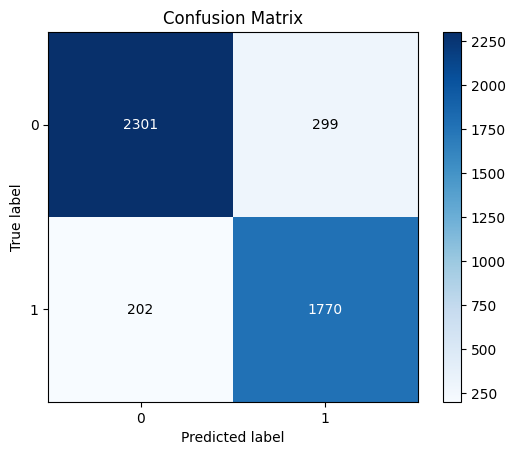

In [92]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

plt.show()

### Passive Aggressive Classifier Algorithm

this algo works well with text data and is basically used for text data

In [96]:
linear_clf=PassiveAggressiveClassifier()

In [97]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [98]:
predictions=linear_clf.predict(X_test)

In [99]:
metrics.accuracy_score(y_test,predictions)

0.9087926509186351

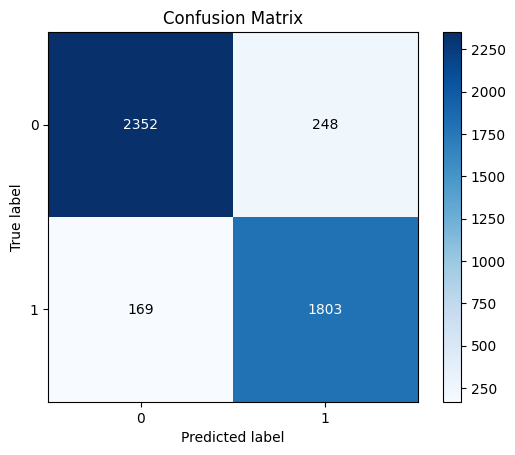

In [100]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)

plt.show()

In [102]:
# Get Features names
#to detect which fake and which is most real word

feature_names=cv.get_feature_names_out()

In [104]:
feature_names

array(['abandon', 'abc', 'abc news', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

In [105]:
#most negative value is most fake word,if we go towards lower value in -ve,ie we have most fake value

classifier.feature_log_prob_[0]

array([ -9.05829051,  -9.51027564, -10.3575735 , ...,  -9.66442632,
       -11.45618579,  -9.66442632])

**you can access the conditional log-probabilities of the features for each class using the feature_log_prob_ attribute. Each row in this matrix represents the conditional log-probability of features for a specific class.**

In [108]:
### Most 30 real values
sorted(zip(classifier.feature_log_prob_[0],feature_names),reverse=True)[0:30]

[(-2.934403143227554, 'new'),
 (-2.9841991883994403, 'time'),
 (-2.98797277778308, 'york'),
 (-2.988182839752133, 'new york'),
 (-3.0047051389267434, 'york time'),
 (-3.0047051389267434, 'new york time'),
 (-3.947947012298936, 'breitbart'),
 (-4.020157970625751, 'trump'),
 (-5.303453092273495, 'donald'),
 (-5.307717491059952, 'donald trump'),
 (-5.762453648174899, 'say'),
 (-6.005147333411899, 'obama'),
 (-6.058023085459847, 'clinton'),
 (-6.152880878918523, 'state'),
 (-6.1934955980727135, 'presid'),
 (-6.252179099900804, 'brief'),
 (-6.263228936087389, 'report'),
 (-6.274402236685514, 'attack'),
 (-6.291399813054085, 'hous'),
 (-6.393590753950632, 'brief new york'),
 (-6.393590753950632, 'brief new'),
 (-6.3999399816292915, 'news'),
 (-6.406329779728062, 'hillari'),
 (-6.438905950162675, 'kill'),
 (-6.45223948103214, 'year'),
 (-6.4589735132134845, 'even'),
 (-6.486372487401598, 'hillari clinton'),
 (-6.493341156717692, 'white'),
 (-6.507425896599431, 'russia'),
 (-6.514543364368295,